In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
import plotly
from plotly.offline import download_plotlyjs,iplot,plot, init_notebook_mode

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#reading the csv files 

train = pd.read_csv('hm_train.csv')
test = pd.read_csv('hm_test.csv')
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


In [4]:
#train = pd.read_csv('hm_train.csv')
#test = pd.read_csv('hm_test.csv')
#train.head()

In [5]:
train.isnull().sum() # there are no null values in the data set 

hmid                  0
reflection_period     0
cleaned_hm            0
num_sentence          0
predicted_category    0
dtype: int64

In [6]:
train.shape # total no of rows = 60321 and 5 columns 

(60321, 5)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

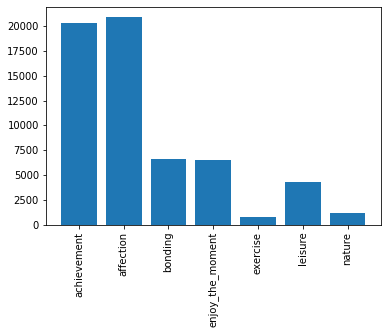

In [7]:
class_tots= train.groupby('predicted_category').count()
plt.bar(class_tots.index,class_tots['hmid'])
plt.xticks(rotation = 'vertical')

In [12]:
class_tots = class_tots.reset_index()
class_tots

,predicted_category,hmid,reflection_period,cleaned_hm,num_sentence
0,achievement,20274,20274,20274,20274
1,affection,20880,20880,20880,20880
2,bonding,6561,6561,6561,6561
3,enjoy_the_moment,6508,6508,6508,6508
4,exercise,729,729,729,729
5,leisure,4242,4242,4242,4242
6,nature,1127,1127,1127,1127


In [15]:
import plotly.express as px
fig = px.bar(class_tots,class_tots['predicted_category'],class_tots['hmid'])
fig.show()

In [0]:
from nltk.probability import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
freq_d = FreqDist()
lema = WordNetLemmatizer()

In [8]:
train.columns

Index(['hmid', 'reflection_period', 'cleaned_hm', 'num_sentence',
       'predicted_category'],
      dtype='object')

In [9]:
train['clean'] = train['cleaned_hm'].str.lower().str.replace('[^a-zA-Z]', ' ')
#converting text to lower case and removing other than plain text 
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category,clean
0,27673,24h,I went on a successful date with someone I fel...,1,affection,i went on a successful date with someone i fel...
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection,i was happy when my son got marks in his e...
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise,i went to the gym this morning and did yoga
3,27676,24h,We had a serious talk with some friends of our...,2,bonding,we had a serious talk with some friends of our...
4,27677,24h,I went with grandchildren to butterfly display...,1,affection,i went with grandchildren to butterfly display...


In [13]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [14]:
stop = set(stopwords.words('english'))

def sw(text):
    text = [lema.lemmatize(word) for word in text.split() if word not in stop]
    return ' '.join(text)
train['clean'] = train['clean'].apply(sw)
train[['cleaned_hm','clean']].head()

,cleaned_hm,clean
0,I went on a successful date with someone I fel...,went successful date someone felt sympathy con...
1,I was happy when my son got 90% marks in his e...,happy son got mark examination
2,I went to the gym this morning and did yoga.,went gym morning yoga
3,We had a serious talk with some friends of our...,serious talk friend flaky lately understood go...
4,I went with grandchildren to butterfly display...,went grandchild butterfly display crohn conser...


In [15]:
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category,clean
0,27673,24h,I went on a successful date with someone I fel...,1,affection,went successful date someone felt sympathy con...
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection,happy son got mark examination
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise,went gym morning yoga
3,27676,24h,We had a serious talk with some friends of our...,2,bonding,serious talk friend flaky lately understood go...
4,27677,24h,I went with grandchildren to butterfly display...,1,affection,went grandchild butterfly display crohn conser...


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(train.predicted_category)
train['class'] = le.transform(train.predicted_category)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(train['clean'],train['class'],test_size= 0.2,random_state = 1)
x_train.shape,x_validate.shape,y_train.shape,y_validate.shape

((48256,), (12065,), (48256,), (12065,))

In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
DTM = CountVectorizer(ngram_range=(2,2)).fit(x_train)
train_dtm = DTM.transform(x_train)
validate_dtm = DTM.transform(x_validate)

# Using DecisionTreeClassifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(train_dtm,y_train)
validate_pred = model.predict(validate_dtm)

In [23]:
from sklearn.metrics import f1_score
f1_score(y_validate,validate_pred,average='weighted')

0.6500812036243385

# Using SVM

In [0]:
from sklearn.svm import SVC

In [0]:
svm_model = SVC(C=1.0,gamma='scale',cache_size=7000,kernel='linear',random_state=42)

In [41]:
svm_model.fit(train_dtm,y_train)

SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
svm_validate_pred = svm_model.predict(validate_dtm)

In [43]:
f1_score(y_validate,svm_validate_pred,average='weighted')

0.724449293188263